In [ ]:
import numpy as np

# activation function
def ReLU(x):
    return x * (x > 0)

# ReLU derivative
def d_relu(z):
    return (z > 0).astype(float)


In [87]:
class NeuralNet:
    def __init__(self, n_input_units, hidden_layers, n_outputs, lr=0.1):
        self.lr = lr

        # architecture
        self.layer_sizes = [n_input_units] + hidden_layers + [n_outputs]

        # parameters
        self.weights = [] 
        self.biases = [] 

        # initialize parameters
        for i in range(len(self.layer_sizes) - 1):
            in_u = self.layer_sizes[i]
            out_u = self.layer_sizes[i + 1]

            self.weights.append(np.random.rand(in_u, out_u) - 0.5)
            self.biases.append(np.random.rand(out_u) - 0.5)



    def forward(self, x):
        self.zs = []
        self.as_ = [x]

        a = x
        for i, (W, b) in enumerate(zip(self.weights, self.biases)):
            z = a @ W + b
            self.zs.append(z)

            if i == len(self.weights) - 1:
                a = z              # in case of linear output
            else:
                a = ReLU(z)

            self.as_.append(a)


        return a


    def loss(self, y_pred, y_true):
        # mean square error as loss function
        L = np.mean((y_pred - y_true) ** 2)
        
        return L
    
    def backward(self, y_true):
        # gradients
        self.dW = [None] * len(self.weights)
        self.db = [None] * len(self.biases)

        a_last = self.as_[-1]
        m = y_true.shape[0]
        grad = 2 * (a_last - y_true) / m


        for i in reversed(range(len(self.weights))):
            
            # gradient for this layer
            self.dW[i] = self.as_[i].T @ grad
            self.db[i] = np.sum(grad, axis=0)

            # propagate to previous layer
            if i != 0:
                grad = grad @ self.weights[i].T
                grad *= d_relu(self.zs[i-1])


    def step(self):
        for i in range(len(self.weights)):
            self.weights[i] -= self.lr * self.dW[i]
            self.biases[i]  -= self.lr * self.db[i]

    
    def train_step(self, x, y):
        y_pred = self.forward(x)
        L = self.loss(y_pred, y)
        self.backward(y)
        self.step()
        return L


In [88]:
np.random.seed(0)

x = np.random.randn(100, 1)
y = 2 * x

y = y.reshape(-1, 1)
x = x.reshape(x.shape[0], -1)



In [92]:
x = x.reshape(x.shape[0], -1)

net = NeuralNet(
    n_input_units=x.shape[1],
    hidden_layers=[8, 4],
    n_outputs=1,
    lr=0.1
)

losses = []

for epoch in range(1000):
    L = net.train_step(x, y)
    losses.append(L)

        

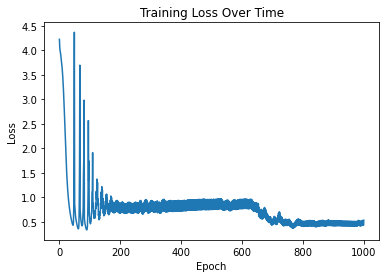

In [93]:
import matplotlib.pyplot as plt

plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss Over Time")
plt.show()
